In [177]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [178]:
df = pd.read_excel('5.xlsx')

In [179]:
df.head()

,Well,Date,Hours Online,Av. WHT (Deg C),Av. WHP (bar),Av. DHT (Deg C),Av. DHP (bar),Platform Choke %,Oil (m3),Gas (m3),Produced Water (m3)
0,0,2007-01-01,24.0,NaN,0.0,NaN,NaN,NaN,431.196,1150737.893,10.604
1,0,2007-01-02,24.0,NaN,0.0,NaN,NaN,NaN,422.406,1153328.996,19.588
2,0,2007-01-03,24.0,NaN,0.0,NaN,NaN,NaN,401.211,1170670.761,19.099
3,0,2007-01-04,24.0,NaN,0.0,NaN,NaN,NaN,388.445,1165082.107,17.125
4,0,2007-01-05,24.0,NaN,0.0,NaN,NaN,NaN,399.161,1171822.363,18.085


In [180]:
import datetime

In [181]:
df['datetime'] = pd.to_datetime(df.index)

In [182]:
df.head()

,Well,Date,Hours Online,Av. WHT (Deg C),Av. WHP (bar),Av. DHT (Deg C),Av. DHP (bar),Platform Choke %,Oil (m3),Gas (m3),Produced Water (m3),datetime
0,0,2007-01-01,24.0,NaN,0.0,NaN,NaN,NaN,431.196,1150737.893,10.604,1970-01-01 00:00:00.000000000
1,0,2007-01-02,24.0,NaN,0.0,NaN,NaN,NaN,422.406,1153328.996,19.588,1970-01-01 00:00:00.000000001
2,0,2007-01-03,24.0,NaN,0.0,NaN,NaN,NaN,401.211,1170670.761,19.099,1970-01-01 00:00:00.000000002
3,0,2007-01-04,24.0,NaN,0.0,NaN,NaN,NaN,388.445,1165082.107,17.125,1970-01-01 00:00:00.000000003
4,0,2007-01-05,24.0,NaN,0.0,NaN,NaN,NaN,399.161,1171822.363,18.085,1970-01-01 00:00:00.000000004


In [183]:
df['Oil (m3)'].value_counts()

0.000000      1676
0.107000         3
431.196000       2
422.406000       2
300.205000       2
              ... 
57.246000        1
57.248000        1
60.372000        1
52.345000        1
169.943469       1
Name: Oil (m3), Length: 3200, dtype: int64

In [184]:
df['Oil (m3)'].dropna()

0       431.196000
1       422.406000
2       401.211000
3       388.445000
4       399.161000
           ...    
4896    164.218947
4897    161.679848
4898    166.132054
4899    164.925761
4900    169.943469
Name: Oil (m3), Length: 4899, dtype: float64

In [185]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Well,4901.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000e+00,0.000000e+00
Hours Online,4899.0,15.116720,11.273679,0.000000,0.0,24.000000,2.400000e+01,2.500000e+01
Av. WHT (Deg C),1910.0,7.162621,20.932882,-30.000000,0.0,0.000000,0.000000e+00,1.750000e+02
Av. WHP (bar),4683.0,13.161461,22.020734,-88.000000,0.0,0.000000,2.400000e+01,9.700000e+01
Av. DHT (Deg C),0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Av. DHP (bar),0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Platform Choke %,1910.0,7.774277,14.717564,0.000000,0.0,0.000000,8.000000e+00,7.600000e+01
Oil (m3),4899.0,165.258041,185.932898,0.000000,0.0,138.336723,2.564662e+02,2.013530e+03
Gas (m3),4899.0,645632.057807,573308.812330,0.000000,0.0,656301.816000,1.083968e+06,1.806170e+06
Produced Water (m3),4899.0,22.856077,45.417960,-8.100945,0.0,0.000000,3.660783e+01,3.416126e+02


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='Oil (m3)'>

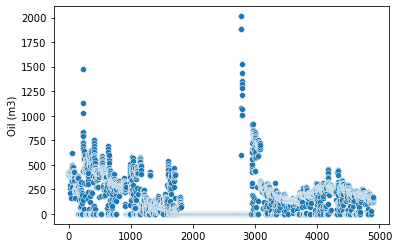

In [186]:
sns.scatterplot(df.index,df['Oil (m3)'])

In [187]:
df_test = df.loc[1900:3000,:]

In [188]:
df_train = df.drop(df.index[1900:3000])

In [189]:
df_train = df_train.fillna(0)

In [190]:
df_train

,Well,Date,Hours Online,Av. WHT (Deg C),Av. WHP (bar),Av. DHT (Deg C),Av. DHP (bar),Platform Choke %,Oil (m3),Gas (m3),Produced Water (m3),datetime
0,0,2007-01-01,24.0,0.0,0.0,0.0,0.0,0.0,431.196000,1.150738e+06,10.604000,1970-01-01 00:00:00.000000000
1,0,2007-01-02,24.0,0.0,0.0,0.0,0.0,0.0,422.406000,1.153329e+06,19.588000,1970-01-01 00:00:00.000000001
2,0,2007-01-03,24.0,0.0,0.0,0.0,0.0,0.0,401.211000,1.170671e+06,19.099000,1970-01-01 00:00:00.000000002
3,0,2007-01-04,24.0,0.0,0.0,0.0,0.0,0.0,388.445000,1.165082e+06,17.125000,1970-01-01 00:00:00.000000003
4,0,2007-01-05,24.0,0.0,0.0,0.0,0.0,0.0,399.161000,1.171822e+06,18.085000,1970-01-01 00:00:00.000000004
...,...,...,...,...,...,...,...,...,...,...,...,...
4896,0,2020-05-28,24.0,0.0,0.0,0.0,0.0,0.0,164.218947,4.128055e+05,128.134356,1970-01-01 00:00:00.000004896
4897,0,2020-05-29,24.0,0.0,0.0,0.0,0.0,0.0,161.679848,4.127378e+05,161.508791,1970-01-01 00:00:00.000004897
4898,0,2020-05-30,24.0,0.0,0.0,0.0,0.0,0.0,166.132054,4.121576e+05,125.656117,1970-01-01 00:00:00.000004898
4899,0,2020-05-31,24.0,0.0,0.0,0.0,0.0,0.0,164.925761,4.112877e+05,127.122054,1970-01-01 00:00:00.000004899


In [191]:
X_train = df_train[['Hours Online','Gas (m3)','Produced Water (m3)']]
y_train = df_train['Oil (m3)']

In [192]:
X_test = df_test[['Hours Online','Gas (m3)','Produced Water (m3)']]

In [193]:
from sklearn.linear_model import LinearRegression

In [194]:
model = LinearRegression()

In [165]:
model.fit(X_train,y_train)

LinearRegression()

In [166]:
yp_test = model.predict(X_test)

In [167]:
yp_test.shape

(1101,)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='Oil (m3)'>

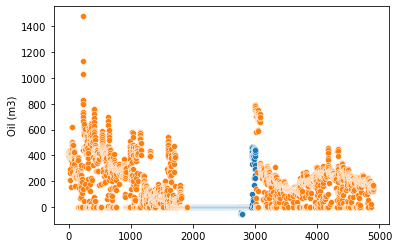

In [168]:
sns.scatterplot(df_test.index,yp_test)
sns.scatterplot(df_train.index,df_train['Oil (m3)'])